1. 

En este ejercicio vas a trabajar con un clasificador binario. Para ello utilizarás el dataset usuarios_win_mac_lin.csv. Elimina del dataframe todas las filas que se correspondan con la clase valor "1". Encontrarás datos de navegación de usuarios dentro de una web (paginas, duración...) y tendrás que predecir desde qué sistema operativo viene el usuario.

Realiza el ejercicio con el nuevo dataframe (eliminando los 1s):

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv("usuarios_win_mac_lin.csv")

In [3]:
df = df[~(df['clase'] == 1)]
df.clase.unique()

array([2, 0], dtype=int64)

In [5]:
X = df.drop("clase", 1) #quito la columna
y = df.clase

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                   random_state = 42)

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [6]:
y_train

110    2
118    2
74     0
0      2
12     2
      ..
111    2
146    0
14     2
132    0
142    0
Name: clase, Length: 104, dtype: int64

In [7]:
y_pred.tolist()

[0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2]

In [8]:
df_pred = pd.DataFrame({"clase":y_test,
                        "prediction": y_pred})

df_pred["acierto"] = np.where(df_pred["clase"] == df_pred["prediction"], True, False)

In [9]:
df_pred

clase  prediction  acierto
82       0           0     True
67       0           0     True
37       2           2     True
58       0           0     True
155      0           2    False
83       0           0     True
97       2           2     True
145      0           2    False
121      2           2     True
53       0           0     True
135      0           0     True
54       0           0     True
91       0           0     True
4        2           2     True
137      0           0     True
140      0           0     True
63       0           2    False
120      2           2     True
133      0           0     True
124      2           2     True
36       2           2     True
10       2           2     True
160      0           0     True
11       2           2     True
166      0           0     True
72       0           2    False

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[13,  4],
       [ 0,  9]], dtype=int64)

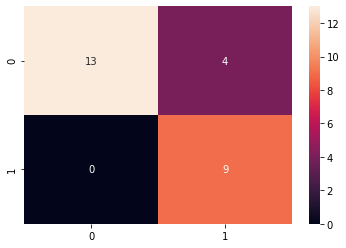

In [16]:
sns.heatmap(conf_matrix, annot=True);

In [17]:
model.score(X_test, y_test)

0.8461538461538461

In [18]:
accuracy_score(y_test, model.predict(X_test))

0.8461538461538461

In [19]:
model.classes_

array([0, 2], dtype=int64)

In [20]:
model = LogisticRegression(penalty='l1',
                          C = 4.28, solver='liblinear')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

model.score(X_test, y_test)

0.9230769230769231

In [23]:
from sklearn.model_selection import GridSearchCV

model_grid = LogisticRegression()
param_grid = {'penalty' : ['l1', 'l2'],
              'C' : [1,2,3,4,5,6,7],
              'solver' : ['liblinear']}

clf = GridSearchCV(model_grid, param_grid = param_grid, cv = 10, verbose=True, n_jobs=-1, iid='False')

best_clf = clf.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.1s finished


In [24]:
best_clf.best_params_

{'C': 2, 'penalty': 'l1', 'solver': 'liblinear'}

In [25]:
best_clf.best_score_

0.9711538461538461